In [3]:
import numpy as np

from scipy import signal, fft

import matplotlib.pyplot as plt

In [6]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w, 20*np.log10(np.abs(h)))
    ax.set_ylim(-60, 5)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

In [7]:
def get_dft(x, fs):
    dft = 2*fft.fft(x)/(x.size)
    dft_freq = fft.fftfreq(x.size, d=1/fs)

    return dft, dft_freq

In [8]:
def before_and_after(x, y, fs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xdft, xdft_freq = get_dft(x, fs)
    ax.plot(xdft_freq, 20*np.log10(np.abs(xdft)))
    ydft, ydft_freq = get_dft(y, fs)
    ax.plot(ydft_freq, 20*np.log10(np.abs(ydft)))
    ax.set_ylim(-60, 10)

In [9]:
def plot_dft(x, fs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xdft, xdft_freq = get_dft(x, fs)
    ax.plot(xdft_freq, 20*np.log10(np.abs(xdft)))
    ax.set_ylim(-60, 10)

In [10]:
def get_halfband(ntaps, gain=2):
    t_band = 0.1
    taps = signal.remez(ntaps, [0, 0.25-(t_band/2), 0.25+(t_band/2), 0.5], [gain, 0])
    #for n in range(taps.size):
    #    if abs(taps[n]) < 0.0001:
    #        taps[n] = 0
    return taps

In [11]:
def upsample(x, factor):
    n = x.size
    ret = np.zeros((factor*n))
    ret[::factor] = x
    return ret

In [12]:
def downsample(x, factor):
    n = x.size / factor
    n = int(n)
    ret = np.zeros(n)
    for j in range(n):
        ret[j] = x[2*j]
        
    return ret   

In [13]:
def distort(x, gain):
    x = np.tanh(x*gain) / np.tanh(gain);
    return x

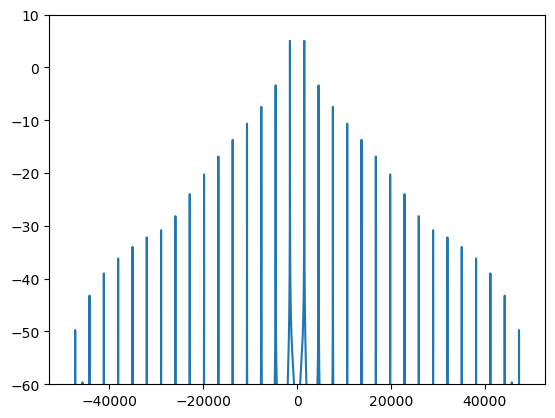

In [44]:
oversample = 2
fs = 96000
t = np.linspace(0, 1, fs)
f = 1524
x = np.sin(2*np.pi*f*t)
tanh_gain = 10
fold_gain = 1

xu = upsample(x, oversample)
taps = get_halfband(35, gain = 2)
xuf = signal.convolve(xu, taps)
xdu = distort(xuf, tanh_gain)
xduf = signal.convolve(xdu, taps)

xdown = downsample(xduf, oversample)

plot_dft(xdown, fs)

plt.show()

Text(0.5, 1.0, 'Upsample Filter')

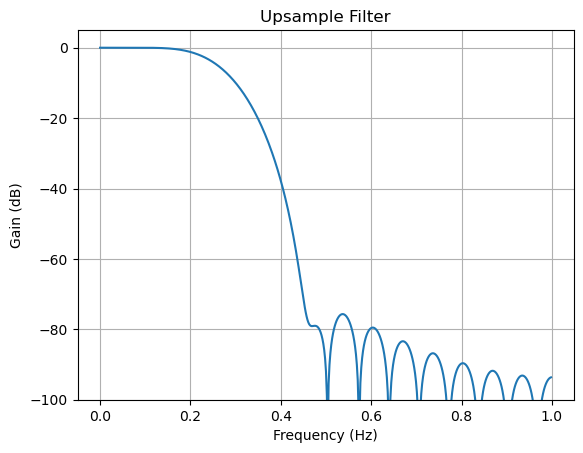

In [60]:
ntaps = 31
taps = signal.firwin(ntaps, 0.27, window='blackman')
w, h = signal.freqz(taps[1:taps.size-1])

#plot_response(w, h, 'Upsample filter')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w/np.pi, 20*np.log10(np.abs(h)))
ax.set_ylim(-100, 5)
ax.grid(True)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Gain (dB)')
ax.set_title('Upsample Filter')

In [61]:
taps

array([-4.60536932e-20, -5.80938346e-05, -4.09977720e-04, -7.29944966e-04,
        2.09815388e-04,  3.34660176e-03,  6.92743461e-03,  5.54705653e-03,
       -6.06706615e-03, -2.51373342e-02, -3.57235382e-02, -1.47624411e-02,
        5.06299828e-02,  1.46845091e-01,  2.34428129e-01,  2.69908570e-01,
        2.34428129e-01,  1.46845091e-01,  5.06299828e-02, -1.47624411e-02,
       -3.57235382e-02, -2.51373342e-02, -6.06706615e-03,  5.54705653e-03,
        6.92743461e-03,  3.34660176e-03,  2.09815388e-04, -7.29944966e-04,
       -4.09977720e-04, -5.80938346e-05, -4.60536932e-20])